### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
Work in a group whom you did not worked before and submit the work before Next class
- Rename the notebook Practice_ClassNB_Pandas_XX (your initial)
- Indivijual submission 

#### Import pandas, numpy

In [1]:
import numpy as np
import pandas as pd

### 1. Load the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
df=pd.read_csv('311-service-requests.csv',dtype='unicode')
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


### 2. What's even in it? (the summary)


In [3]:
print(df.head())#top 5
print(df.tail())#bottom 5
print(df.info())# info about the data types
print(df.columns)# info about the columns
print(df.sample(5))#sample of 5 random entries in the data


  Unique Key            Created Date             Closed Date Agency  \
0   26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1   26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2   26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   
3   26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD   
4   26590930  10/31/2013 01:53:44 AM                     NaN  DOHMH   

                               Agency Name           Complaint Type  \
0          New York City Police Department  Noise - Street/Sidewalk   
1          New York City Police Department          Illegal Parking   
2          New York City Police Department       Noise - Commercial   
3          New York City Police Department          Noise - Vehicle   
4  Department of Health and Mental Hygiene                   Rodent   

                     Descriptor        Location Type Incident Zip  \
0                  Loud Talking      Street/Sidewalk        11432   
1  Comme

In [4]:
df.describe()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,111069,111069,60270,111069,111069,111069,110613,79022,98807,84441,...,185,185,180,219,49,24,70,98143,98143,98143
unique,111069,57872,35596,26,135,165,788,90,248,41189,...,37,38,2,160,17,2,39,50653,50505,50653
top,26589651,10/24/2013 12:00:00 AM,10/28/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226,130 AUDUBON AVENUE,...,BQE/Gowanus Expwy,East/Long Island Bound,Roadway,Roadway,Flushing #1 Field,Staten Island Bound,Unknown,40.842708163812766,-73.93675169432969,"(40.842708163812766, -73.93675169432969)"
freq,1,3659,1359,39067,39067,14200,14126,39067,1996,120,...,24,22,127,11,12,13,14,120,120,120


### spaces in column names are replaced with ‘_’
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]

In [5]:
df.columns=[column.replace(" ", "_") for column in df.columns]

### 3. Which month and year the complains received?


In [6]:
df['Created_Date']=pd.to_datetime(df['Created_Date'])

In [7]:
df['Year']=df['Created_Date'].dt.year

In [8]:
df['Month']=df['Created_Date'].dt.month

df.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Year,Month
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)",2013,10
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013,10
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)",2013,10
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)",2013,10
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)",2013,10


In [9]:
print(df.value_counts('Month'))
print(df.value_counts("Year"))

Month
10    111069
dtype: int64
Year
2013    111069
dtype: int64


### All complaints are recieved in October in 2013

### 4. Drop the columns which you are not going to use for any analysis/ not bringing any meaningful informations/ most of the entries are null (Find out 5 and explain why you selected that)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   object        
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

In [11]:
df.head()
df.drop(['Bridge_Highway_Segment','Garage_Lot_Name','Ferry_Direction','Ferry_Terminal_Name','Latitude','Longitude','Location'],axis=1,inplace=True)

In [12]:
df.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Not_Found,School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Year,Month
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10


### We decided to drop
- Bridge Highway Segment, most entries were null
- Garage lot name, most entries were null
- Ferry Direction, most entries were null
- Ferry Terminal Name, delted ferry direction so this wouldn't make sense to add
- Latitude, too specific can use zipcode
- Longitude, too specific can use zipcode
- Location, too specific can use zipcode

### 5. Is there any missing value in the dataset? Display the list.
Impute the missing values in Street_Name, Address_Type, and City 

In [13]:
print(f" Missing values for Street Name {df['Street_Name'].isnull().sum()}.")
print(f" Missing values for Address type {df['Address_Type'].isnull().sum()}.")
print(f" Missing values for City {df['City'].isnull().sum()}.")
df['Street_Name'].fillna('Unknown',inplace=True)
df['City'].fillna('Unknown',inplace=True)
df['Address_Type'].fillna('unknown', inplace=True)
print(f" Missing values for Street Name {df['Street_Name'].isnull().sum()}.")
print(f" Missing values for Address type {df['Address_Type'].isnull().sum()}.")
print(f" Missing values for City {df['City'].isnull().sum()}.")

 Missing values for Street Name 26637.
 Missing values for Address type 8822.
 Missing values for City 12215.
 Missing values for Street Name 0.
 Missing values for Address type 0.
 Missing values for City 0.


In [14]:
df.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                            0
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                           0
City                                   0
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

### 6. What are the top 5 `complains` received? Show the result graphically using bar plot.

<Axes: >

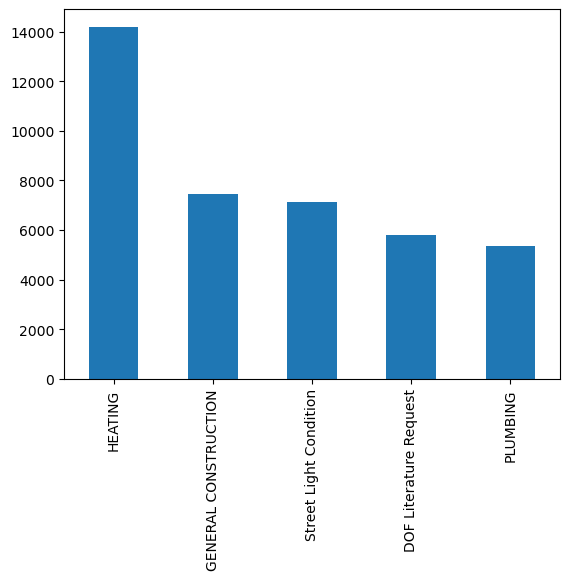

In [15]:
df['Complaint_Type'].value_counts().head(5).plot(kind='bar')

## Top five complaints are 
- Heating 
- General Construction 
- Street Light condition 
- DOF Literature Request
- Plumbing 

### 7. What's the most common `Borough` the complain came? Display top 5 most and plot them out

<Axes: >

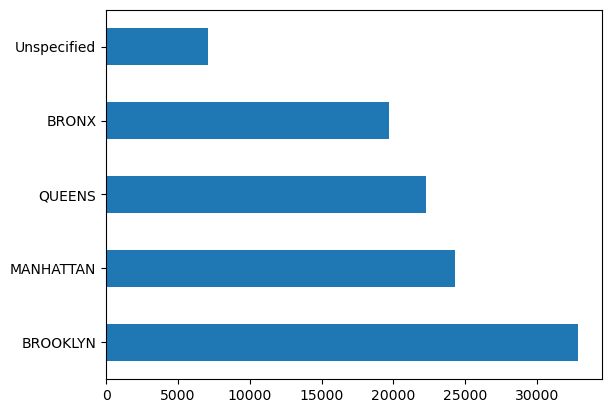

In [16]:
df['Borough'].value_counts().head(5).plot(kind='barh')

## The most common Borough is Brooklyn

### 8. Which agency received the most complain and which one least?

In [17]:
df['Agency_Name'].value_counts().head(1)

Department of Housing Preservation and Development    39067
Name: Agency_Name, dtype: int64

In [18]:
df['Agency_Name'].value_counts().tail(1)

School - Grace Dodge Career and Technical Education High School    1
Name: Agency_Name, dtype: int64

### The max complaints was in `Department of Housing Presevation`
### The minimum complaints was in `Grace Dodge Career adn Technical Education High School`

## 9. Investigate the data set and look for meaningful information for two more questions (Indivijual/ discuss with partner)
We will discuss the new findings in Tueaday's class

### Top 5 most common descriptors
- Loud Music/Party (least)
- No Access 
- Property Tax Exemptino Application for Owners - English
- Street Light Out
- Heat (most)

<Axes: >

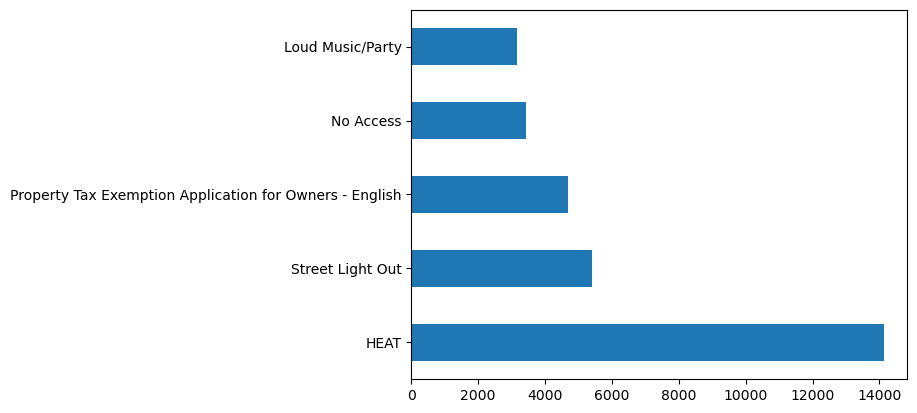

In [19]:
df['Descriptor'].value_counts().head(5).plot(kind='barh')

## Top 5 Location Types 
- Residentail Building
- Street/Sidewalk
- street
- sidewalk
- club/bar/Resturant

<Axes: >

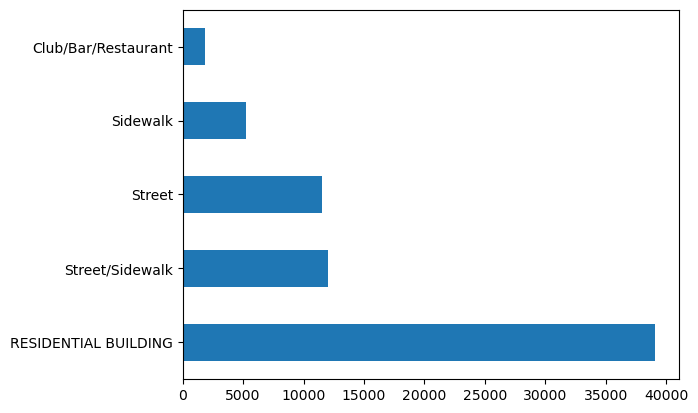

In [20]:
df['Location_Type'].value_counts().head(5).plot(kind='barh')

### 10. Select illegal Parking complains at Queens Borough and save it to new_complaint. How many entries are there?
You can use `query`/iloc

In [21]:
new_complaint=df.query('Complaint_Type=="Illegal Parking" & Borough =="QUEENS"' )

In [22]:
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Not_Found,School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Year,Month
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
116,26591037,2013-10-30 23:20:57,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
117,26592954,2013-10-30 23:20:26,10/31/2013 01:18:56 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
140,26592551,2013-10-30 23:01:49,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
186,26591575,2013-10-30 22:33:28,10/30/2013 11:06:35 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110969,26428092,2013-10-04 01:32:20,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11377,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
111000,26431018,2013-10-04 01:08:14,10/04/2013 07:09:47 AM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11435,147-23 ARCHER AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
111030,26431986,2013-10-04 00:28:01,10/04/2013 03:02:09 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11385,78-51 81 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
111047,26428989,2013-10-04 00:13:08,10/04/2013 02:12:47 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,10


### There are 111065 entries in the new data set 

### 11. Filter 3 columns `Complaint_Type, Created_Date,Descriptor` from the new_complaint and save it as a CSV file named **Complains at Queens**.

In [23]:
new_complaint=new_complaint[['Complaint_Type','Created_Date','Descriptor','Borough']]

In [24]:
new_complaint.to_csv('newdata',index=False)

### 12. Load it back to verify the data

In [25]:
df=pd.read_csv('newdata',index_col=[0])

In [26]:
df.head()

,Created_Date,Descriptor,Borough
Complaint_Type,,,
Illegal Parking,2013-10-31 02:01:04,Commercial Overnight Parking,QUEENS
Illegal Parking,2013-10-30 23:20:57,Blocked Hydrant,QUEENS
Illegal Parking,2013-10-30 23:20:26,Posted Parking Sign Violation,QUEENS
Illegal Parking,2013-10-30 23:01:49,Commercial Overnight Parking,QUEENS
Illegal Parking,2013-10-30 22:33:28,Commercial Overnight Parking,QUEENS
